In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [2]:
X_digits, y_digits = load_digits(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.3)

In [3]:
n_labeled = 50

log_reg = LogisticRegression()
log_reg.fit(X_train[: n_labeled], y_train[: n_labeled])

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
log_reg.score(X_test, y_test)

0.8

In [5]:
k = 50
kmeans = KMeans(n_clusters = k)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
X_digits_dist = kmeans.transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
representative_digit_idx

array([ 247,  984,  669, 1053,  822,  234, 1150,  500,  774, 1167, 1027,
        640,  965,  212,  823,  379,  273,  638,  307,  365,  407, 1248,
        639, 1149,  907,  281, 1190, 1031, 1241,  707,  974,  162,  798,
        973, 1066,  193,  950,  277, 1063,  172,  913,  891,  138,  543,
        111,  667,  473,  786,  121,  760], dtype=int64)

In [7]:
X_representative_digits = X_train[representative_digit_idx]

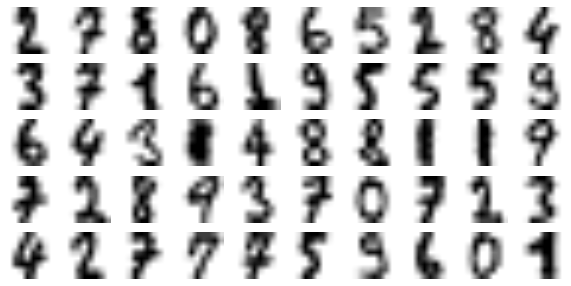

In [8]:
plt.figure(figsize = (10, 5))

for i, j in enumerate(X_representative_digits, 1):
    plt.subplot(5, 10, i)
    plt.imshow(j.reshape(8, 8), cmap = 'binary', interpolation = 'bilinear')
    plt.axis(False)

In [9]:
# every time we have to update it manually, unless the model will be
# trained on wrong label.
y_representative_digits = np.array([
    2, 7, 8, 0, 8, 6, 5, 2, 8, 4,
    3, 7, 1, 6, 1, 9, 5, 5, 5, 8,
    6, 4, 3, 8, 4, 8, 8, 1, 1, 9,
    7, 2, 8, 9, 3, 7, 0, 7, 2, 3,
    4, 2, 7, 7, 7, 5, 9, 6, 0, 1
])

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
log_reg.score(X_test, y_test)

0.8851851851851852

In [12]:
train_inst = []
for i in range(10):
    train_inst.append(X_digits[y_digits == i][10])

In [13]:
train_inst = np.array(train_inst)

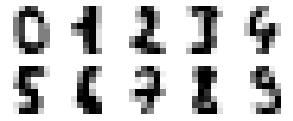

In [14]:
plt.figure(figsize = (5, 2))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_inst[i].reshape(8, 8), cmap = 'binary')
    plt.axis(False)

In [15]:
log_reg = LogisticRegression()
log_reg.fit(train_inst, range(10))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log_reg.score(X_test, y_test)

0.687037037037037

In [17]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
X_digits_idx = kmeans.transform(X_train)
X_representative_idx = np.argmin(X_digits_idx, axis = 0)
X_representative = X_train[X_representative_idx]

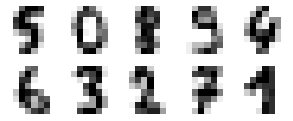

In [19]:
plt.figure(figsize = (5, 2))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_representative[i].reshape(8, 8), cmap = 'binary')
    plt.axis(False)

In [20]:
y_representative = np.array([5, 0, 8, 9, 4, 6, 3, 2, 7, 1])

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_representative, y_representative)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
log_reg.score(X_test, y_test)

0.7833333333333333

In [26]:
labeled = 200

log_reg = LogisticRegression()
log_reg.fit(X_train[: labeled], y_train[: labeled])

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
log_reg.score(X_test, y_test)

0.9481481481481482

In [28]:
kmeans = KMeans(n_clusters = 200)
kmeans.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
X_digit_id = kmeans.transform(X_train)
X_representative_idx = np.argmin(X_digit_id, axis = 0)
X_representative = X_train[X_representative_idx]

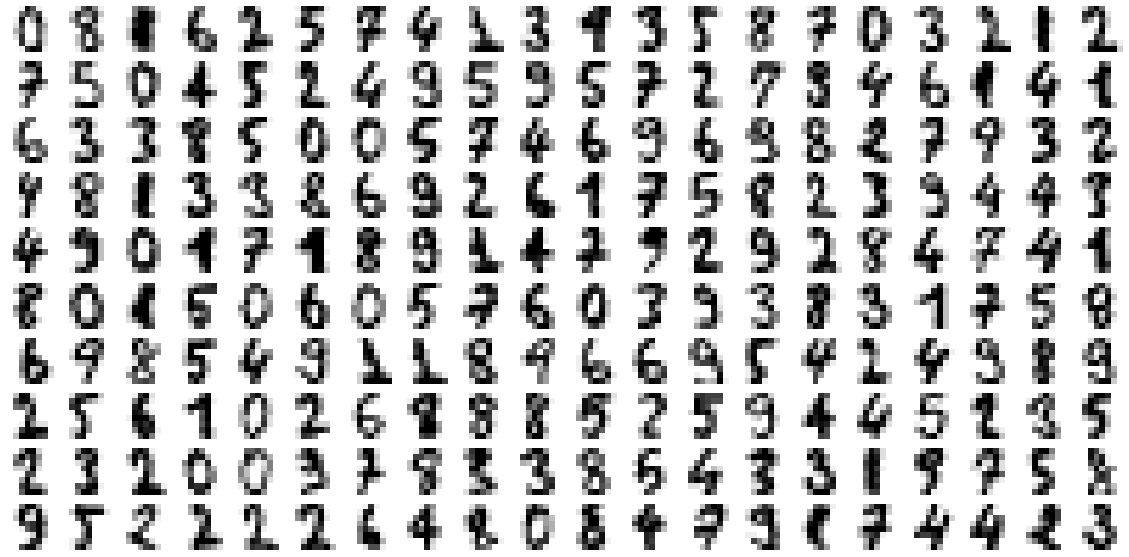

In [46]:
plt.figure(figsize = (20, 10))
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(representative_digits[i].reshape(8, 8), cmap = 'binary')
    plt.axis(False)

In [47]:
y_representative = np.array([
    0, 8, 8, 6, 2, 5, 7, 4, 2, 3, 4, 3, 5, 8, 7, 0, 3, 2, 1, 2,
    7, 5, 0, 4, 5, 2, 4, 9, 5, 9, 5, 7, 2, 7, 3, 4, 6, 1, 4, 1,
    6, 3, 3, 8, 5, 0, 0, 5, 7, 4, 6, 9, 6, 9, 8, 2, 7, 9, 3, 2,
    4, 8, 1, 3, 3, 8, 6, 9, 2, 6, 1, 7, 5, 8, 2, 3, 3, 4, 4, 3,
    4, 9, 0, 1, 7, 1, 8, 9, 1, 4, 7, 9, 2, 9, 2, 8, 4, 7, 4, 1,
    8, 0, 8, 5, 0, 6, 0, 5, 7, 6, 0, 3, 9, 3, 8, 3, 1, 7, 5, 8,
    6, 9, 8, 5, 4, 9, 1, 1, 8, 9, 6, 6, 9, 5, 4, 2, 4, 9, 8, 9,
    2, 5, 6, 1, 0, 2, 6, 8, 8, 8, 5, 2, 5, 9, 4, 4, 5, 2, 3, 5,
    2, 3, 2, 0, 0, 3, 7, 8, 3, 3, 8, 5, 4, 3, 3, 1, 3, 7, 5, 8,
    9, 5, 2, 2, 2, 2, 4, 4, 8, 0, 8, 4, 7, 9, 8, 7, 4, 4, 2, 3
])

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_representative, y_representative)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
log_reg.score(X_test, y_test)

0.9148148148148149

In [61]:
labeled = 50

kmeans = KMeans(n_clusters = labeled)
kmeans.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
X_digits_dist = kmeans.transform(X_train)
X_representative_idx = np.argmin(X_digits_dist, axis = 0)
X_representative = X_train[X_representative_idx]

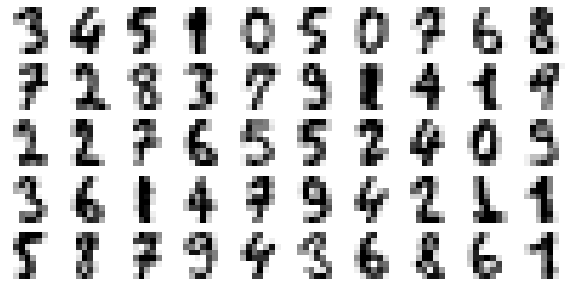

In [88]:
plt.figure(figsize = (10, 5))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_representative[i].reshape(8, 8), cmap = 'binary')
    plt.axis(False)

In [89]:
y_representative = np.array([
    3, 4, 5, 1, 0, 5, 0, 7, 6, 8,
    7, 2, 8, 3, 7, 9, 2, 4, 1, 9,
    2, 2, 7, 6, 5, 5, 2, 4, 0, 9,
    3, 6, 1, 4, 7, 9, 4, 2, 1, 1,
    5, 8, 7, 9, 4, 3, 6, 8, 6, 1
])

In [90]:
log_reg = LogisticRegression()
log_reg.fit(X_representative, y_representative)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
log_reg.score(X_test, y_test)

0.8555555555555555

In [92]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(50):
    y_train_propagated[kmeans.labels_ == i] = y_representative[i]

In [93]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
log_reg.score(X_test, y_test)

0.8907407407407407

#### Next part in : semi-supervised_learning_practice